### Objective of the Exploration
* Provide summary statistics
    * Descriptive Statistics
* Determine operating cost of individual power plants
* Show how fuel costs impact the viability of the different generation sources
* Highlight the competitiveness of renewable electricity
* Show how the generation mix of different utilities evolved overtime

In [34]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv('raw_data.csv')
df.head(5)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [36]:
df.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [37]:
# rename columns
df.columns = ['record_id', 'utility_id', 'year', 'plant_name',
              'type', 'unit', 'qty_burned', 'mmbtu_PU',
              'cost_PU_burned', 'cost_PU_delivered', 'cost_per_mmbtu']

In [38]:
# compute values for summary statistcs
a = len(df)
b = len(df['utility_id'].unique())
c = '{}-{}'.format(df['year'].min(), df['year'].max())
d = len(df['plant_name'].unique())
e = len(df['type'].unique())

In [39]:
summ = {'Item': ['Records', 'Utilities', 'Period', 'Plants', 'Sources'], \
       'Value': [a, b, c, d, e]}
sum_table = pd.DataFrame(summ)
sum_table.set_index('Item', inplace=True)
sum_table.transpose()

Item,Records,Utilities,Period,Plants,Sources
Value,29523,185,1994-2018,2315,6


This simple record summary shows how much investment is made on electricity across the United States. 2307 plants accross the country is a rather large number in a bid to provide stable and improved energy for household and organisations.

## Data Cleaning

In [40]:
# check data types
df.dtypes

record_id             object
utility_id             int64
year                   int64
plant_name            object
type                  object
unit                  object
qty_burned           float64
mmbtu_PU             float64
cost_PU_burned       float64
cost_PU_delivered    float64
cost_per_mmbtu       float64
dtype: object

Every column looks well formatted except year formatted as int64. But since it only contains year, it will be left as is.

In [41]:
# check for duplicates
df.duplicated().any()

False

In [43]:
# check for missing values
df.isnull().sum()

record_id              0
utility_id             0
year                   0
plant_name             0
type                   0
unit                 180
qty_burned             0
mmbtu_PU               0
cost_PU_burned         0
cost_PU_delivered      0
cost_per_mmbtu         0
dtype: int64

Only unit column has missing values. Since it's relating to fuel type, we will fill the missing values based on most occured for unique fuel types.

In [44]:
df['unit'].unique()

array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', nan, 'mwdth', 'mmbtu',
       'mwhth', 'gal'], dtype=object)

In [46]:
df['unit'] = df.groupby('type')['unit'].apply(lambda x : x.fillna(x.value_counts().index[0]))

In [48]:
# comfirm imputation
df['unit'].isnull().sum()

0

## Summary Statistics

In [12]:
# check desccriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
utility_id,29523.0,1.186018e+02,7.417835e+01,1.000000,55.0000,122.000000,176.000,5.140000e+02
year,29523.0,2.005806e+03,7.025483e+00,1994.000000,2000.0000,2006.000000,2012.000,2.018000e+03
qty_burned,29523.0,2.622119e+06,9.118004e+06,1.000000,13817.0000,253322.000000,1424034.000,5.558942e+08
mmbtu_PU,29523.0,8.492111e+00,1.060022e+01,0.000001,1.0240,5.762694,17.006,3.412600e+02
cost_PU_burned,29523.0,2.086490e+02,2.854490e+03,-276.080000,5.2070,26.000000,47.113,1.393580e+05
cost_PU_delivered,29523.0,9.175704e+02,6.877593e+04,-874.937000,3.7785,17.371000,42.137,7.964521e+06
cost_per_mmbtu,29523.0,1.930435e+01,2.091541e+03,-41.501000,1.9400,4.127000,7.745,3.592780e+05


In [99]:
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import matplotlib.dates as mdates

In [14]:
col_names = ['qty_burned', 'mmbtu_PU', 'cost_PU_burned', 'cost_PU_delivered', 'cost_per_mmbtu']

<Figure size 432x288 with 0 Axes>

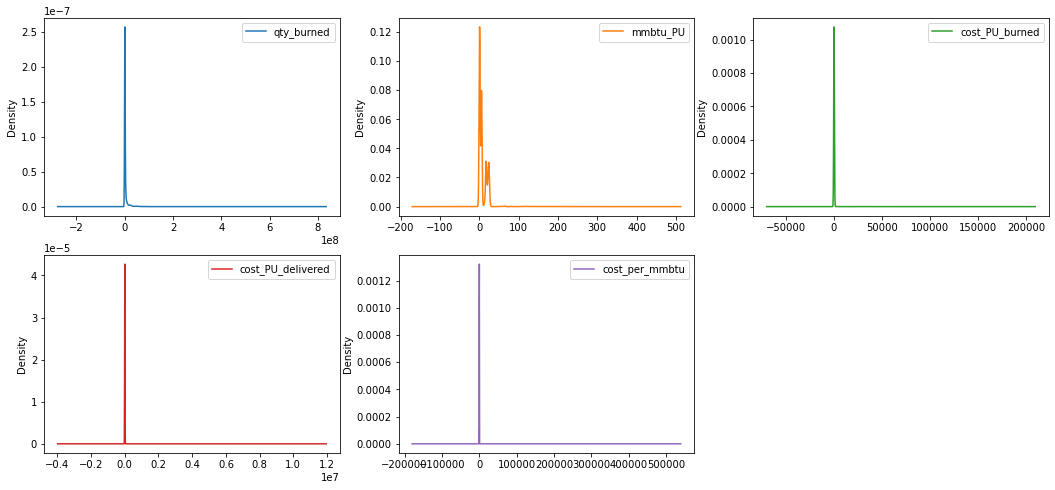

In [15]:
fig = plt.figure()
df[col_names].plot(kind='kde', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(18,8))
plt.show()

In [16]:
# replace outliers with median value as mean value is affected by outliers
Q1 = df[col_names].quantile(0.25)
Q3 = df[col_names].quantile(0.75)
IQR = Q3 - Q1 * 1.5
df[col_names] = np.where(((df[col_names] > Q3 + IQR) | (df[col_names] < Q1 - IQR)), df[col_names].median(), df[col_names])

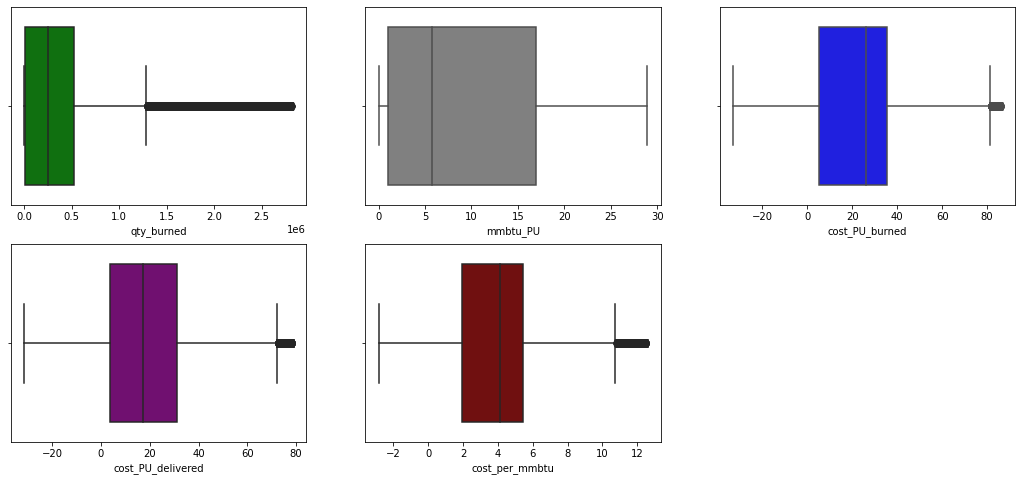

In [17]:
# show boxplot after removing outliers
fig = plt.figure(figsize=(18,8))
ax0 = fig.add_subplot(2,3,1)
ax1 = fig.add_subplot(2,3,2)
ax2 = fig.add_subplot(2,3,3)
ax3 = fig.add_subplot(2,3,4)
ax4 = fig.add_subplot(2,3,5)
sns.boxplot(df[col_names[0]], ax=ax0, color='g')
sns.boxplot(df[col_names[1]], ax=ax1, color='grey')
sns.boxplot(df[col_names[2]], ax=ax2, color='b')
sns.boxplot(df[col_names[3]], ax=ax3, color='purple')
sns.boxplot(df[col_names[4]], ax=ax4, color='maroon')
plt.show()

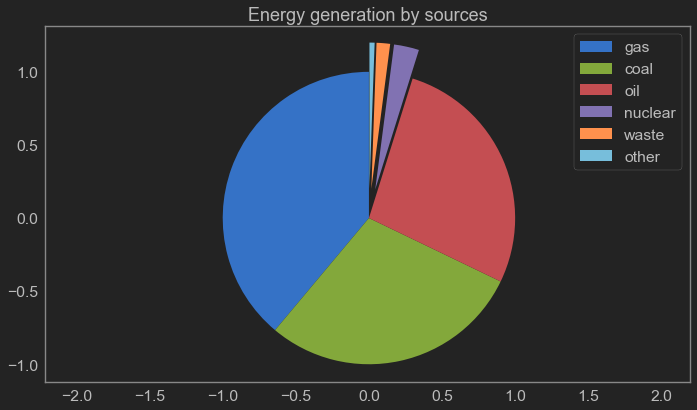

In [136]:
fuel_type=df['type'].value_counts()
fuel_type.plot(kind='pie',
             figsize=(10,6),
             startangle=(90),
             pctdistance=0.6,
             explode=[0,0,0,0.2,0.2,0.2], frame=True,
             autopct=None, labels=None, legend=True),
plt.title('Energy generation by sources')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.show()

Seeing the visualzation above, it becomes clear that the most used source of electricity from 1994 to 2018 used gas, followed by coal. Save the _other_ category, the least generated is waste.

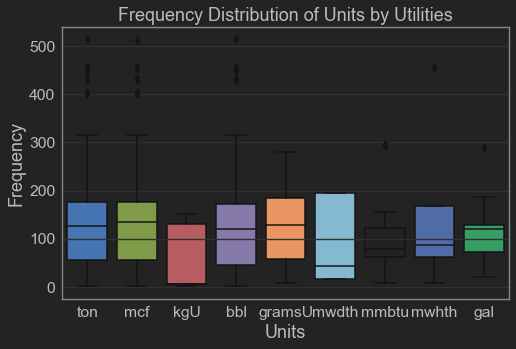

In [137]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.boxplot(x='unit', y='utility_id', data=df)
ax.set_title('Frequency Distribution of Units by Utilities')
ax.set_xlabel('Units')
ax.set_ylabel('Frequency')
plt.show()

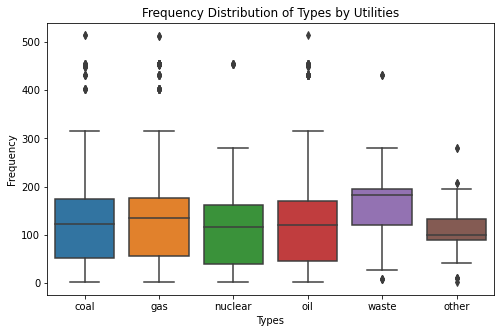

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.boxplot(x='type', y='utility_id', data=df)
ax.set_title('Frequency Distribution of Types by Utilities')
ax.set_xlabel('Types')
ax.set_ylabel('Frequency')
plt.show()

## Operational Cost Per Plant

### Annual Operational Cost for Individual Plants

### Showing how fuel costs impact the viability of the different generation sources

### Showing competition among sources over time

In [30]:
from sklearn.preprocessing import scale

In [67]:
jtplot.style(theme='monokai', context='notebook', fscale=1.5, spines=True)

In [203]:
generation = df.groupby(['year', 'type'], as_index=False).agg({'qty_burned':'sum'})

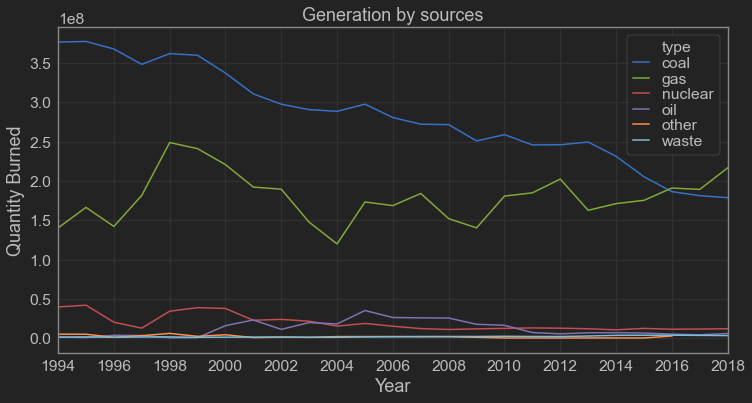

In [309]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.lineplot(x='year', y='qty_burned', hue='type', data=generation)
ax.set_title('Generation by sources')
ax.set_xlabel('Year')
ax.set_ylabel('Quantity Burned')
ax.legend(loc='upper right', labelspacing=0.1, handlelength=1)
ax.set_xlim(1994,2018)
plt.xticks(np.arange(1994, 2018+1, 2))
plt.show()

In [270]:
mix = pd.concat([generation.loc[generation['type'] == 'coal', ['year', 'qty_burned']].set_index('year'),
                generation.loc[generation['type'] == 'gas', ['year', 'qty_burned']].set_index('year'),
                generation.loc[generation['type'] == 'nuclear', ['year', 'qty_burned']].set_index('year'),
                generation.loc[generation['type'] == 'oil', ['year', 'qty_burned']].set_index('year'),
                generation.loc[generation['type'] == 'waste', ['year', 'qty_burned']].set_index('year'),
                generation.loc[generation['type'] == 'other', ['year', 'qty_burned']].set_index('year')], join='outer', axis=1)
mix.columns = ['coal', 'gas', 'nuclear', 'oil', 'waste', 'other']

In [378]:
color = ['#050516', 'maroon', '#6C674A', 'magenta', '#007ED6', '#FF7300']

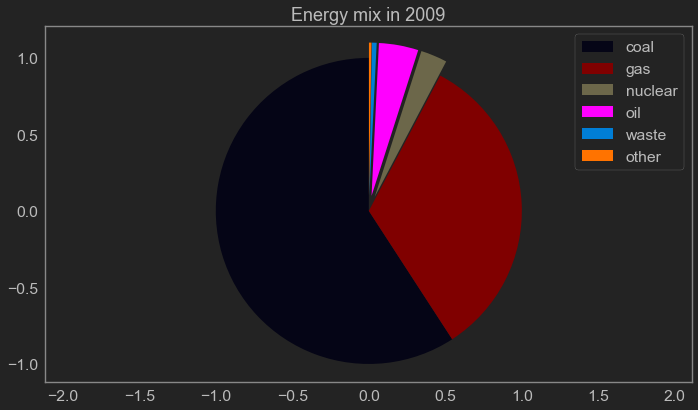

In [381]:
mix_chart = mix.loc[2009]
mix_chart.plot(kind='pie',
             colors = color,
             figsize=(10,6),
             startangle=(90),
             pctdistance=0.6,
             explode=[0,0,0.1,0.1,0.1,0.1], frame=True,
             autopct=None, labels=None, legend=True),
plt.title('Energy mix in {}'.format(mix_chart.name))
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.savefig('pie.png', dpi=200)
plt.show()